In [1]:
%load_ext autoreload
%autoreload 2

%aimport peaks 
%aimport -peaks.core.fileIO.fileIO_opts

# Pump probe measurements

In [2]:
# Import packages
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import peaks as pks
import os
import pint_xarray

# Set default options
xr.set_options(cmap_sequential='Purples', keep_attrs=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'

ureg = pint_xarray.unit_registry

In [3]:
# Set the default file path
pks.opts.FileIO.path = os.getenv('PEAKS_EXAMPLE_DATA_PATH')

In [4]:
data = pks.load('029 TiSe2', lazy=True,metadata=True)

In [5]:
data.metadata

scan:
    name: 029 TiSe2
    filepath: /Users/pdk6/Library/CloudStorage/OneDrive-UniversityofStAndrews/Lab/Example data/029 TiSe2
    loc: CLF_Artemis
    timestamp: 2024-10-31 10:33:48
    scan_command: None
analyser:
    analyser:
        model: Phoibos 100
        slit:
            width: None
            identifier: None
    scan:
        eV: 35.8 eV
        step_size: None
        PE: 30.0 eV
        sweeps: 482
        dwell: None
        lens_mode: WideAngleMode
        acquisition_mode: fixed
        eV_type: kinetic
    angles:
        polar: None
        tilt: None
        azi: 90 deg
    deflector:
        parallel:
            local_name: None
            value: None
        perp:
            local_name: None
            value: None
manipulator:
    polar:
        local_name: polar
        value: None
        reference_value: None
    tilt:
        local_name: None
        value: None
        reference_value: None
    azi:
        local_name: azi
        value: None
      

In [8]:
from peaks import time_resolved

In [22]:
help(data.tr.diff)

/Users/pdk6/Library/Mobile Documents/com~apple~CloudDocs/Work/Software/peaks/peaks/time_resolved/accessors.py:31: AccessorRegistrationWarning: registration of accessor <class 'peaks.time_resolved.accessors.TRAccessors'> under name 'tr' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  @xr.register_dataarray_accessor("tr")


Help on method diff in module peaks.time_resolved.data_select:

diff(t_select, t_static=<Quantity(-250.0, 'femtosecond')>) method of peaks.time_resolved.accessors.TRAccessors instance
    :::{note} This is an accessor to the function `peaks.time_resolved.data_select.diff` acting directly on the DataArray. (Note, the :class:`xarray.DataArray` does not now need to be passed to the function).:::

    Calculate the difference spectrum of the data at some time point or time window and the static data.

        Parameters
        -----------
        da : xarray.DataArray
            time-resolved data, with a time axis with dimension "t".

        t_select : pint.Quantity or float or slice()
            time to select data over. If no units are provided, the units of the data are assumed.
            If a slice is provided, the mean over the slice is calculated.

        t_static : pint.Quantity or float, optional
            time point to assume static up to. If no units are provided, the u

In [21]:
data.tr.static().metadata

/Users/pdk6/Library/Mobile Documents/com~apple~CloudDocs/Work/Software/peaks/peaks/time_resolved/accessors.py:25: AccessorRegistrationWarning: registration of accessor <class 'peaks.time_resolved.accessors.TRAccessors'> under name 'tr' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  def __init__(self, xarray_obj):
[autoreload of peaks.time_resolved.accessors failed: Traceback (most recent call last):
  File "/Users/pdk6/miniconda3/envs/peaks-dev/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/pdk6/miniconda3/envs/peaks-dev/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/pdk6/miniconda3/envs/peaks-dev/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/pdk6/miniconda3/e

scan:
    name: 029 TiSe2
    filepath: /Users/pdk6/Library/CloudStorage/OneDrive-UniversityofStAndrews/Lab/Example data/029 TiSe2
    loc: CLF_Artemis
    timestamp: 2024-10-31 10:33:48
    scan_command: None
analyser:
    analyser:
        model: Phoibos 100
        slit:
            width: None
            identifier: None
    scan:
        eV: 35.8 eV
        step_size: None
        PE: 30.0 eV
        sweeps: 482
        dwell: None
        lens_mode: WideAngleMode
        acquisition_mode: fixed
        eV_type: kinetic
    angles:
        polar: None
        tilt: None
        azi: 90 deg
    deflector:
        parallel:
            local_name: None
            value: None
        perp:
            local_name: None
            value: None
manipulator:
    polar:
        local_name: polar
        value: None
        reference_value: None
    tilt:
        local_name: None
        value: None
        reference_value: None
    azi:
        local_name: azi
        value: None
      

In [20]:
from holoviews import opts as hv_opts
import hvplot.xarray  # noqa: F401

# Set default options
hv_opts.defaults(hv_opts.Image(invert_axes=True))

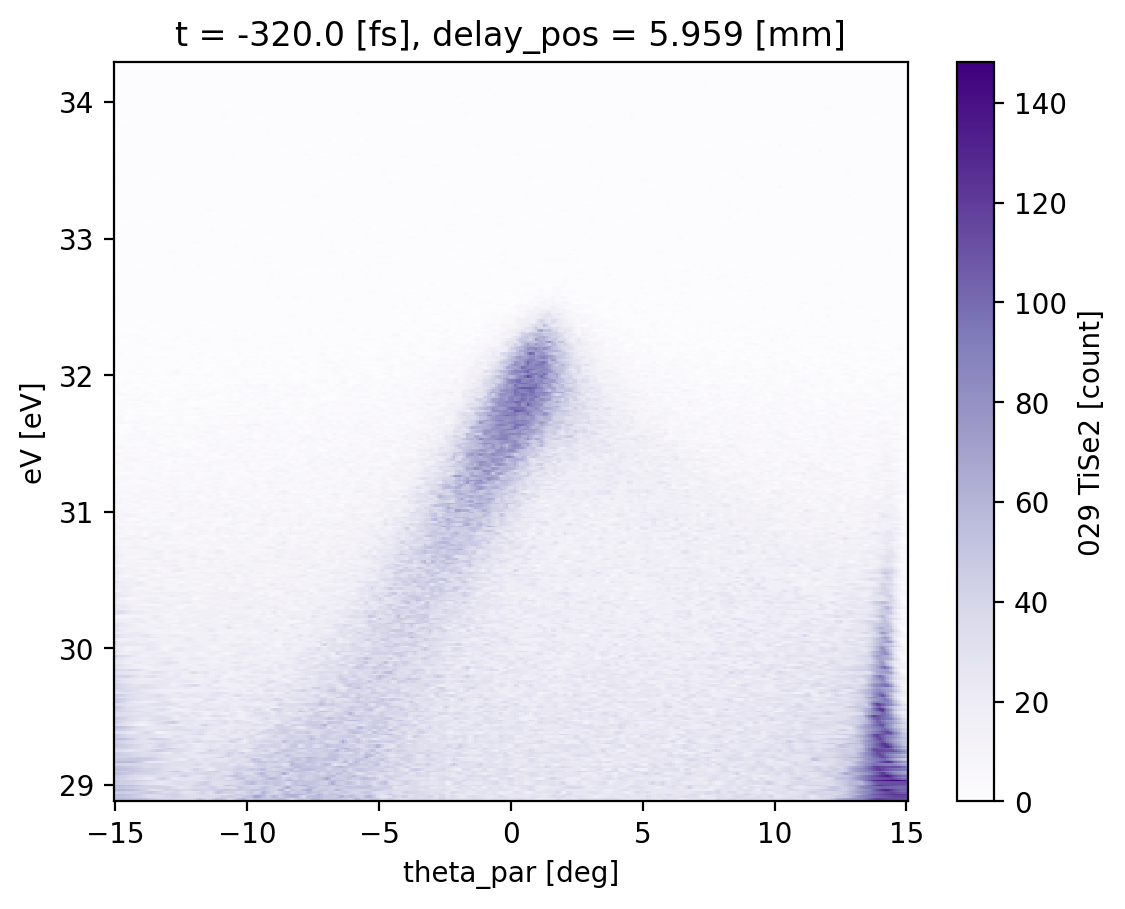

In [25]:
data.isel(t=5).plot()

In [28]:
slice(1,2*ureg('nm'))

slice(1, <Quantity(2, 'nanometer')>, None)

In [31]:
(2*ureg('mm')).units

<Unit('millimeter')>

In [26]:
data

Magnitude,[[[53.28268051147461 53.31747817993164 53.22352981567383 ... 96.41960906982422 96.40917205810547 96.41303253173828] [47.22637939453125 47.23839569091797 47.16483688354492 ... 111.18865203857422 111.42158508300781 111.38352966308594] [47.96992874145508 47.972328186035156 47.73298263549805 ... 115.50169372558594 115.68472290039062 115.6828842163086] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] [[48.80447006225586 48.86246109008789 48.70588302612305 ... 110.686279296875 110.3209228515625 110.45623779296875] [59.08792495727539 59.12798309326172 58.882789611816406 ... 129.38827514648438 129.4127960205078 129.40879821777344] [48.96992874145508 48.972328186035156 48.73298263549805 ... 118.0782241821289 118.2190170288086 118.21760559082031] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] [[52.73929214477539 52.81661605834961 52.60784149169922 ... 119.61568450927734 119.50086212158203 119.54338836669922] [55.27033996582031 55.30238723754883 55.106231689453125 ... 134.88278198242188 135.12799072265625 135.08792114257812] [42.35647964477539 42.356197357177734 42.38435363769531 ... 142.5832977294922 143.27317810058594 143.26626586914062] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] ... [[59.65214157104492 59.63667678833008 59.67843246459961 ... 102.71372985839844 102.54670715332031 102.60856628417969] [46.15715026855469 46.183189392089844 46.02381134033203 ... 100.36446380615234 100.22960662841797 100.25164031982422] [52.435211181640625 52.43803405761719 52.15644836425781 ... 110.34524536132812 110.24668884277344 110.24767303466797] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] [[61.15232849121094 61.22578430175781 61.02745056152344 ... 107.35686492919922 107.27335357666016 107.30428314208984] [43.29560470581055 43.293601989746094 43.30586242675781 ... 112.02381134033203 112.18318939208984 112.15715026855469] [67.43521118164062 67.43803405761719 67.15644836425781 ... 114.46257781982422 114.57521057128906 114.57408142089844] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] [[49.782867431640625 49.906585693359375 49.572547912597656 ... 115.25882720947266 115.22750854492188 115.23910522460938] [55.33956527709961 55.35759353637695 55.24725341796875 ... 122.97618865966797 122.81681060791016 122.84284973144531] [53.791690826416016 53.79423141479492 53.54080581665039 ... 121.9217758178711 121.7809829711914 121.78239440917969] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]]]
Units,count
Magnitude,[5.857148 5.887118 5.917089 5.947059 5.953053 5.959047 5.965041 5.971035 5.97703 5.983024 5.989018 5.995012 6.001006 6.007 6.012994 6.018988 6.024982 6.030976 6.03697 6.042965 6.048959 6.054953 6.060947 6.066941 6.074434 6.081926 6.089419 6.096911 6.104404 6.111897 6.119389 6.126882 6.134374 6.141867 6.14936 6.156852 6.171838 6.186823 6.201808 6.216793 6.231778 6.246764 6.261749 6.276734 6.291719 6.306705 6.456557 6.606409 6.756262 6.906114 7.055966 7.205819 7.355671 7.505523 7.655376 7.805228 7.95508 8.104933 8.254785]
Units,mm


In [36]:
(100*ureg('fs')/2*ureg.speed_of_light).to('m')

<Quantity(1.4989622900000001e-05, 'meter')>

In [39]:
(1*ureg.c).to('m/s')

<Quantity(299792458.0, 'meter / second')>

In [21]:
data.iplot(groupby=['t'])

:DynamicMap   [t]
   :Image   [theta_par,eV]   (029 TiSe2)

In [15]:
float('sdsa')

ValueError: could not convert string to float: 'sdsa'

In [6]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

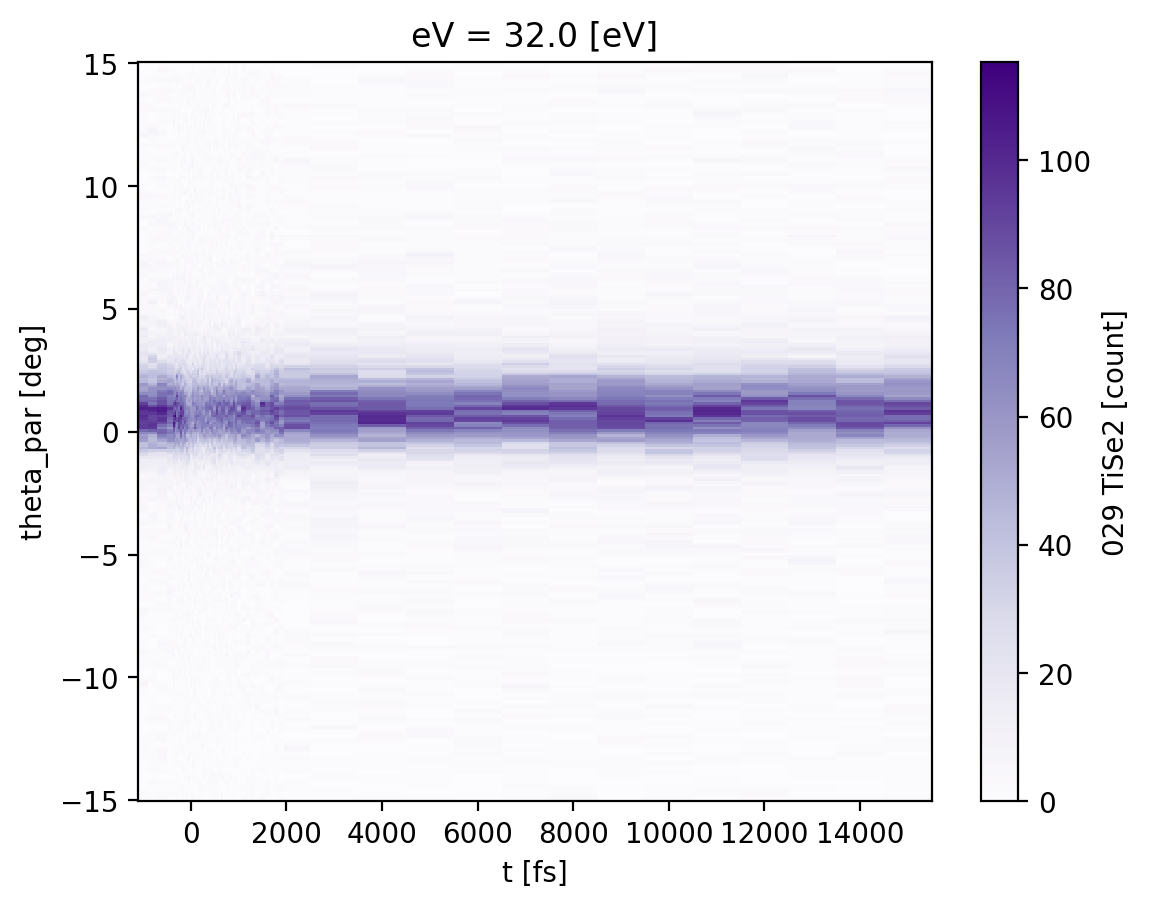

In [14]:
data.MDC(32).plot()

In [7]:
import hvplot.pandas  # Ensure hvplot can work with pandas dataframes
import holoviews as hv
hv.extension('bokeh')  # Enables interactive plots with the Bokeh backend


In [8]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'x': range(10),
    'y': [i**2 for i in range(10)]
})

# hvplot example
df.hvplot.line(x='x', y='y')


:Curve   [x]   (y)

In [16]:
temp = "Da1 = 1.003 1.356 1.334 # mm_z/deg^1"

In [20]:
temp.split()

['Da1', '=', '1.003', '1.356', '1.334', '#', 'mm_z/deg^1']

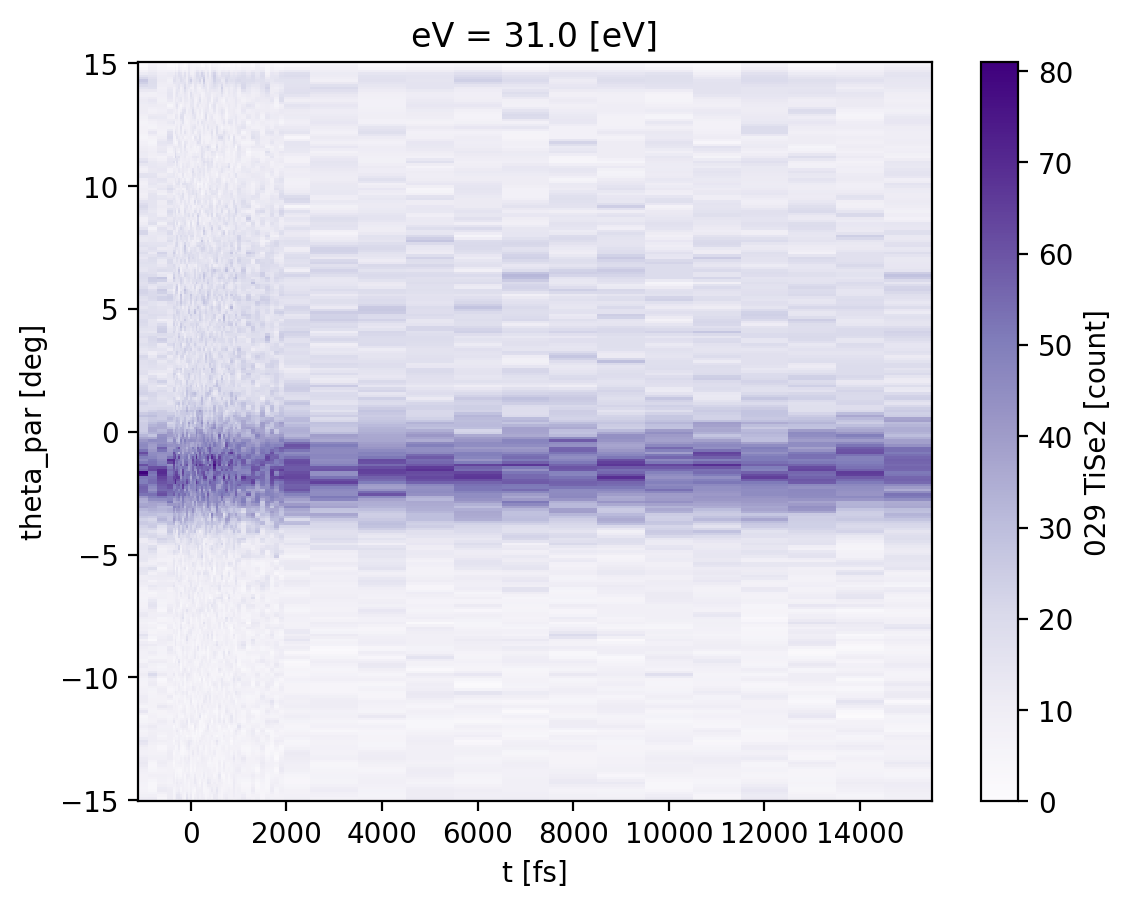

In [30]:
data.MDC(31).plot()

In [32]:
from peaks.core.GUI import iplot

In [33]:
data.iplot(groupby=['t'])

:DynamicMap   [t]
   :Image   [theta_par,eV]   (029 TiSe2)

In [16]:
fpath = os.path.join(os.getenv('PEAKS_EXAMPLE_DATA_PATH'),'029 TiSe2','Info.tsv')

[autoreload of peaks.core.fileIO.loaders.clf failed: Traceback (most recent call last):
  File "/Users/pdk6/miniconda3/envs/peaks-dev/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/pdk6/miniconda3/envs/peaks-dev/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Users/pdk6/miniconda3/envs/peaks-dev/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 991, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1129, in get_code
  File "<frozen importlib._bootstrap_external>", line 1059, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Users/pdk6/Library/Mobile Documents/

In [17]:
with open(fpath, "r") as f:
    info_file = f.readlines()

In [18]:
meta_dict = {item.split(':',1)[0]: item.split(':',1)[1] for item in info_file[0].split(';') if len(item.split(':'))==2}

In [19]:
meta_dict['Delay List']

'-1000_-400_200#LF-360_400_40#LF450_1000_50#LF1100_2000_100#LF3000_15000_1000'

In [22]:
def parse_ranges(input_string):
    ranges = input_string.split('#LF')
    result = []
    
    for r in ranges:
        start, stop, step = map(int, r.split('_'))
        result.extend(range(start, stop + step, step))  # +step to include the endpoint if it's on the step

    return result

# Example usage

values_list = parse_ranges(meta_dict['Delay List'])
print(np.asarray(values_list)*ureg('fs'))


[-1000  -800  -600  -400  -360  -320  -280  -240  -200  -160  -120   -80   -40     0    40    80   120   160   200   240   280   320   360   400   450   500   550   600   650   700   750   800   850   900   950  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000 12000 13000 14000 15000] fs
